In [1]:
import pandas as pd
import numpy as np
import datasets
from datasets import Dataset, load_dataset

In [5]:
# the code is adapted from the "fine-tuning a pretrained model" and
# "fine-tuning a model with the trainer API" course and examples on hugging face
# check huggingface for further explanations

# load data - SMILES and labels of the molecules 
esol_data = pd.read_csv("C:/Users/pj11/Documents/bert_finetune/esol.csv")

mol_smiles = esol_data['SMILES']
log_s = esol_data['measured log(solubility:mol/L)']
esol_data['number'] = esol_data.index
mol_number = esol_data['number']
mol_name =esol_data['Compound ID']

In [8]:
# shuffle data and split into 6 parts
esol_data_shuffled = esol_data.sample(frac=1)
esol_data_splits = np.array_split(esol_data_shuffled, 6)
for df in esol_data_splits:
    display(df)

,Compound ID,measured log(solubility:mol/L),ESOL predicted log(solubility:mol/L),SMILES,number
1063,styrene oxide,-1.600,-1.826,C1OC1c2ccccc2,1063
469,Butyraldehyde,-0.010,-0.749,CCCC=O,469
502,Chlorothalonil,-5.640,-3.995,c1(C#N)c(Cl)c(C#N)c(Cl)c(Cl)c(Cl)1,502
207,2-Decanone,-3.300,-2.617,CCCCCCCCC(=O)C,207
1132,Trimazosin,-3.638,-3.958,COc2cc1c(N)nc(nc1c(OC)c2OC)N3CCN(CC3)C(=O)OCC(...,1132
...,...,...,...,...,...
952,Phenylmethanol,-0.400,-1.699,OCc1ccccc1,952
771,Lactose,-0.244,1.071,OCC1OC(OC2C(O)C(O)C(O)OC2CO)C(O)C(O)C1O,771
673,"Etoposide (148-167,25mg/ml)",-3.571,-3.292,COc1cc(cc(OC)c1O)C6C2C(COC2=O)C(OC4OC3COC(C)OC...,673
522,cortisone acetate,-4.210,-3.426,CC(=O)OCC(=O)C3(O)CCC4C2CCC1=CC(=O)CCC1(C)C2C(...,522


,Compound ID,measured log(solubility:mol/L),ESOL predicted log(solubility:mol/L),SMILES,number
567,Dialifor,-6.340,-5.026,CCOP(=S)(OCC)SC(CCl)N1C(=O)c2ccccc2C1=O,567
1109,trans-2-Pentene,-2.540,-2.076,CC/C=C/C,1109
699,Flutriafol,-3.370,-3.569,OC(Cn1cncn1)(c2ccc(F)cc2)c3ccccc3F,699
977,Prednisolone,-3.180,-2.974,CC12CC(O)C3C(CCC4=CC(=O)C=CC34C)C2CCC1(O)C(=O)CO,977
1006,p-terphenyl,-7.110,-5.741,c1ccc(cc1)c2ccc(cc2)c3ccccc3,1006
...,...,...,...,...,...
40,"1,3-Difluorobenzene",-2.000,-2.636,Fc1cccc(F)c1,40
602,dimethirimol,-2.240,-3.570,CCCCc1c(C)nc(nc1O)N(C)C,602
790,Medrogestone,-5.270,-4.593,CC(=O)C3(C)CCC4C2C=C(C)C1=CC(=O)CCC1(C)C2CCC34C,790
473,captafol,-5.400,-4.365,ClC(Cl)C(Cl)(Cl)SN2C(=O)C1CC=CCC1C2=O,473


,Compound ID,measured log(solubility:mol/L),ESOL predicted log(solubility:mol/L),SMILES,number
21,"1,2-Dibromoethane",-1.680,-2.102,BrCCBr,21
805,Methocarbamol,-0.985,-1.428,COc1ccccc1OCC(O)COC(N)=O,805
221,2-Hydroxypyridine,1.020,-1.655,Oc1ccccn1,221
268,"3,4-PCB",-6.390,-5.223,Clc1ccc(cc1Cl)c2ccccc2,268
430,Benzonitrile,-1.000,-2.030,N#Cc1ccccc1,430
...,...,...,...,...,...
904,Oxadiazon,-5.696,-5.265,CC(C)Oc1cc(c(Cl)cc1Cl)n2nc(oc2=O)C(C)(C)C,904
850,Monuron,-2.890,-2.671,CN(C)C(=O)Nc1ccc(Cl)cc1,850
546,Cyclopropyl-5-spirobarbituric acid,-1.886,-0.088,O=C2NC(=O)C1(CC1)C(=O)N2,546
1128,Trietazine,-4.060,-3.233,CCNc1nc(Cl)nc(n1)N(CC)CC,1128


,Compound ID,measured log(solubility:mol/L),ESOL predicted log(solubility:mol/L),SMILES,number
450,Bromophos,-6.090,-5.604,COP(=S)(OC)Oc1cc(Cl)c(Br)cc1Cl,450
457,butachlor,-4.190,-4.347,CCCCOCN(C(=O)CCl)c1c(CC)cccc1CC,457
752,isocarbamid,-2.150,-1.508,C1N(C(=O)NCC(C)C)C(=O)NC1,752
381,Ametryn,-3.040,-3.430,CCNc1nc(NC(C)C)nc(SC)n1,381
383,Aminocarb,-2.360,-2.677,CNC(=O)Oc1ccc(N(C)C)c(C)c1,383
...,...,...,...,...,...
1075,Terbumeton,-3.239,-3.505,CCNc1nc(NC(C)(C)C)nc(OC)n1,1075
456,butacarb,-4.240,-4.642,c1(C(C)(C)C)cc(C(C)(C)C)cc(OC(=O)NC)c1,456
923,p-Chloronitrobenzene,-2.920,-2.901,Clc1ccc(cc1)N(=O)=O,923
827,Methyl t-butyl ether,-0.240,-0.984,COC(C)(C)C,827


,Compound ID,measured log(solubility:mol/L),ESOL predicted log(solubility:mol/L),SMILES,number
586,Diethyl phthalate,-2.350,-3.016,CCOC(=O)c1ccccc1C(=O)OCC,586
1112,Triamcinolone,-3.680,-2.734,CC34CC(O)C1(F)C(CCC2=CC(=O)C=CC12C)C3CC(O)C4(O...,1112
700,Fluvalinate,-8.003,-8.057,CC(C)C(Nc1ccc(cc1Cl)C(F)(F)F)C(=O)OC(C#N)c2ccc...,700
606,Dimethyldisulfide,-1.440,-1.524,CSSC,606
69,1-Chloro-2-bromoethane,-1.320,-1.738,ClCCBr,69
...,...,...,...,...,...
603,Dimethoxymethane,0.480,0.092,COCOC,603
92,1-Iodopropane,-2.290,-2.486,CCCI,92
962,p-Hydroxybenzaldehyde,-0.960,-2.003,Oc1ccc(C=O)cc1,962
961,p-Hydroxyacetanilide,-1.030,-1.495,CC(=O)Nc1ccc(O)cc1,961


,Compound ID,measured log(solubility:mol/L),ESOL predicted log(solubility:mol/L),SMILES,number
865,nicotinamide,0.610,-0.964,NC(=O)c1cccnc1,865
851,Morin,-3.083,-2.731,Oc1ccc(c(O)c1)c3oc2cc(O)cc(O)c2c(=O)c3O,851
179,"2,4-Dimethylpyridine",0.380,-2.098,Cc1ccnc(C)c1,179
1066,sulfaguanidine,-1.990,-0.706,NC(=N)NS(=O)(=O)c1ccc(N)cc1,1066
628,Endrin,-6.180,-4.533,ClC4=C(Cl)C5(Cl)C3C1CC(C2OC12)C3C4(Cl)C5(Cl)Cl,628
...,...,...,...,...,...
385,aminothiazole,-0.360,-1.226,Nc1nccs1,385
45,"1,4-Dibromobenzene",-4.070,-4.298,Brc1ccc(Br)cc1,45
1101,Thiourea,0.320,0.329,NC(=S)N,1101
936,Pentylcyclopentane,-6.080,-3.869,CCCCCC1CCCC1,936


In [9]:
# save SMILES and log S columns without index. BERT only handles text input and label
esol_data_splits[0].to_csv('esol_bert_ds1.csv', columns=["SMILES", "measured log(solubility:mol/L)"], index=False, header=False)
esol_data_splits[1].to_csv('esol_bert_ds2.csv', columns=["SMILES", "measured log(solubility:mol/L)"], index=False, header=False)
esol_data_splits[2].to_csv('esol_bert_ds3.csv', columns=["SMILES", "measured log(solubility:mol/L)"], index=False, header=False)
esol_data_splits[3].to_csv('esol_bert_ds4.csv', columns=["SMILES", "measured log(solubility:mol/L)"], index=False, header=False)
esol_data_splits[4].to_csv('esol_bert_ds5.csv', columns=["SMILES", "measured log(solubility:mol/L)"], index=False, header=False)
esol_data_splits[5].to_csv('esol_bert_ds6.csv', columns=["SMILES", "measured log(solubility:mol/L)"], index=False, header=False)

In [10]:
# split data for training, validation and test
dataset = load_dataset('csv', data_files={'train':['esol_bert_ds1.csv', 'esol_bert_ds2.csv',
                                                   'esol_bert_ds3.csv', 'esol_bert_ds4.csv'],
                                          'validation':'esol_bert_ds5.csv',
                                          'test': 'esol_bert_ds6.csv'}, delimiter=',', column_names =['smiles', 'label'])

Using custom data configuration default-92d38e0886c1388e


Extracting data files:   0%|          | 0/3 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

Dataset csv downloaded and prepared to C:/Users/pj11/.cache/huggingface/datasets/csv/default-92d38e0886c1388e/0.0.0/6b34fb8fcf56f7c8ba51dc895bfa2bfbe43546f190a60fcf74bb5e8afdcc2317. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

In [11]:
# check data format
dataset['validation'][1]

{'smiles': 'CC34CC(O)C1(F)C(CCC2=CC(=O)C=CC12C)C3CC(O)C4(O)C(=O)CO',
 'label': -3.68}

In [12]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from transformers import TrainingArguments, Trainer

# specify model from hugging face
tokenizer = AutoTokenizer.from_pretrained("seyonec/ChemBERTa-zinc-base-v1")

def tokenize_function(examples):
    return tokenizer(examples["smiles"], padding="max_length", truncation=True)

In [13]:
tokenized_datasets = dataset.map(tokenize_function, batched=True)

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

In [14]:
tokenized_datasets

DatasetDict({
    train: Dataset({
        features: ['smiles', 'label', 'input_ids', 'attention_mask'],
        num_rows: 764
    })
    validation: Dataset({
        features: ['smiles', 'label', 'input_ids', 'attention_mask'],
        num_rows: 190
    })
    test: Dataset({
        features: ['smiles', 'label', 'input_ids', 'attention_mask'],
        num_rows: 190
    })
})

In [15]:
#small_train_dataset = tokenized_datasets["train"].shuffle(seed=random_state).select(range(1000))
#small_eval_dataset = tokenized_datasets["validation"].shuffle(seed=random_state).select(range(1000))

small_train_dataset = tokenized_datasets["train"]
small_eval_dataset = tokenized_datasets["validation"]
small_test_dataset = tokenized_datasets["test"]

In [16]:
# for regression, num_labels=1
model = AutoModelForSequenceClassification.from_pretrained("seyonec/ChemBERTa-zinc-base-v1", num_labels=1)

Some weights of the model checkpoint at seyonec/ChemBERTa-zinc-base-v1 were not used when initializing RobertaForSequenceClassification: ['lm_head.dense.weight', 'lm_head.bias', 'roberta.pooler.dense.bias', 'roberta.pooler.dense.weight', 'lm_head.dense.bias', 'lm_head.layer_norm.bias', 'lm_head.decoder.weight', 'lm_head.layer_norm.weight', 'lm_head.decoder.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at seyonec/ChemBERTa-zinc-base-v1 and a

In [17]:
import evaluate
import numpy as np

In [18]:
# define metric
mae_metric = evaluate.load("mae")
mse_metric = evaluate.load("mse")
pearsonr_metric = evaluate.load("pearsonr")

def compute_metrics(eval_pred):
    # print(eval_pred)
    #logits, labels = eval_pred
    #predictions = np.argmax(logits, axis=-1)
    predictions, labels = eval_pred
    
    metrics = {}
    metrics.update({'mae': mae_metric.compute(predictions=predictions, references=labels)})
    metrics.update({'rmse': mse_metric.compute(predictions=predictions, references=labels, squared=False)})
    metrics.update({'pearsonr': pearsonr_metric.compute(predictions=predictions, references=labels)})
    
    return metrics

In [21]:
# directory to save the finetuned model
para_output_dir = 'C:/Users/pj11/Documents/bert_finetune/esol_cross_val_fold1/'
model_output_path = f'{para_output_dir}/model'

# specify trainining arguments 
training_args = TrainingArguments(output_dir=para_output_dir, 
                                  evaluation_strategy="epoch",
                                  #per_device_train_batch_size = 64,
                                  #per_device_eval_batch_size = 64,
                                  num_train_epochs=50)

PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).


In [22]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_datasets["train"],
    eval_dataset=tokenized_datasets["validation"],
    compute_metrics=compute_metrics,
)

In [23]:
# finetuning
trainer.train()

The following columns in the training set don't have a corresponding argument in `RobertaForSequenceClassification.forward` and have been ignored: smiles. If smiles are not expected by `RobertaForSequenceClassification.forward`,  you can safely ignore this message.
C:\Users\pj11\Anaconda3\envs\my-rdkit-env\lib\site-packages\transformers\optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
***** Running training *****
  Num examples = 764
  Num Epochs = 50
  Instantaneous batch size per device = 8
  Total train batch size (w. parallel, distributed & accumulation) = 32
  Gradient Accumulation steps = 1
  Total optimization steps = 1200
  Number of trainable parameters = 44104705
C:\Users\pj11\Anaconda3\envs\my-rdkit-env\lib\site-packages\torch\nn\parallel\_functions.py:68: UserWarning: Wa

Epoch,Training Loss,Validation Loss,Mae,Rmse,Pearsonr
1,No log,2.115088,{'mae': 1.141613884466259},{'mse': 1.4458805286183218},{'pearsonr': 0.7614326844553287}
2,No log,1.495403,{'mae': 0.958748148636292},{'mse': 1.221023724272807},{'pearsonr': 0.8324600864619512}
3,No log,1.202737,{'mae': 0.8215819827035854},{'mse': 1.0945978107007368},{'pearsonr': 0.867999904366651}
4,No log,1.160444,{'mae': 0.7793772140493322},{'mse': 1.0775005611577635},{'pearsonr': 0.8751701570974229}
5,No log,1.122146,{'mae': 0.8111030566849207},{'mse': 1.0565729347548232},{'pearsonr': 0.8922044687002608}
6,No log,0.916757,{'mae': 0.7298687760767184},{'mse': 0.9555913576116796},{'pearsonr': 0.9062261970605414}
7,No log,0.917433,{'mae': 0.720156423041695},{'mse': 0.9548123568841171},{'pearsonr': 0.9016985119636058}
8,No log,0.893491,{'mae': 0.7341310234446274},{'mse': 0.9437075952002831},{'pearsonr': 0.9163934870267392}
9,No log,0.791980,{'mae': 0.6669069816015268},{'mse': 0.8897984703463379},{'pearsonr': 0.914732028177176}
10,No log,0.763678,{'mae': 0.668831652530322},{'mse': 0.8711022144155557},{'pearsonr': 0.9226131761875704}


The following columns in the evaluation set don't have a corresponding argument in `RobertaForSequenceClassification.forward` and have been ignored: smiles. If smiles are not expected by `RobertaForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 190
  Batch size = 32
C:\Users\pj11\Anaconda3\envs\my-rdkit-env\lib\site-packages\torch\nn\parallel\_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
C:\Users\pj11\Anaconda3\envs\my-rdkit-env\lib\site-packages\torch\cuda\nccl.py:15: UserWarning: PyTorch is not compiled with NCCL support
  warnings.warn('PyTorch is not compiled with NCCL support')
The following columns in the evaluation set don't have a corresponding argument in `RobertaForSequenceClassification.forward` and have been ignored: smiles. If smiles ar

The following columns in the evaluation set don't have a corresponding argument in `RobertaForSequenceClassification.forward` and have been ignored: smiles. If smiles are not expected by `RobertaForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 190
  Batch size = 32
C:\Users\pj11\Anaconda3\envs\my-rdkit-env\lib\site-packages\torch\nn\parallel\_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
C:\Users\pj11\Anaconda3\envs\my-rdkit-env\lib\site-packages\torch\cuda\nccl.py:15: UserWarning: PyTorch is not compiled with NCCL support
  warnings.warn('PyTorch is not compiled with NCCL support')
The following columns in the evaluation set don't have a corresponding argument in `RobertaForSequenceClassification.forward` and have been ignored: smiles. If smiles ar

Saving model checkpoint to C:/Users/pj11/Documents/bert_finetune/esol_cross_val_fold1/checkpoint-500
Configuration saved in C:/Users/pj11/Documents/bert_finetune/esol_cross_val_fold1/checkpoint-500\config.json
Model weights saved in C:/Users/pj11/Documents/bert_finetune/esol_cross_val_fold1/checkpoint-500\pytorch_model.bin
C:\Users\pj11\Anaconda3\envs\my-rdkit-env\lib\site-packages\torch\nn\parallel\_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
C:\Users\pj11\Anaconda3\envs\my-rdkit-env\lib\site-packages\torch\cuda\nccl.py:15: UserWarning: PyTorch is not compiled with NCCL support
  warnings.warn('PyTorch is not compiled with NCCL support')
The following columns in the evaluation set don't have a corresponding argument in `RobertaForSequenceClassification.forward` and have been ignored: smiles. If smiles are not expecte

The following columns in the evaluation set don't have a corresponding argument in `RobertaForSequenceClassification.forward` and have been ignored: smiles. If smiles are not expected by `RobertaForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 190
  Batch size = 32
C:\Users\pj11\Anaconda3\envs\my-rdkit-env\lib\site-packages\torch\nn\parallel\_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
C:\Users\pj11\Anaconda3\envs\my-rdkit-env\lib\site-packages\torch\cuda\nccl.py:15: UserWarning: PyTorch is not compiled with NCCL support
  warnings.warn('PyTorch is not compiled with NCCL support')
The following columns in the evaluation set don't have a corresponding argument in `RobertaForSequenceClassification.forward` and have been ignored: smiles. If smiles ar

The following columns in the evaluation set don't have a corresponding argument in `RobertaForSequenceClassification.forward` and have been ignored: smiles. If smiles are not expected by `RobertaForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 190
  Batch size = 32
C:\Users\pj11\Anaconda3\envs\my-rdkit-env\lib\site-packages\torch\nn\parallel\_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
C:\Users\pj11\Anaconda3\envs\my-rdkit-env\lib\site-packages\torch\cuda\nccl.py:15: UserWarning: PyTorch is not compiled with NCCL support
  warnings.warn('PyTorch is not compiled with NCCL support')
The following columns in the evaluation set don't have a corresponding argument in `RobertaForSequenceClassification.forward` and have been ignored: smiles. If smiles ar

The following columns in the evaluation set don't have a corresponding argument in `RobertaForSequenceClassification.forward` and have been ignored: smiles. If smiles are not expected by `RobertaForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 190
  Batch size = 32
C:\Users\pj11\Anaconda3\envs\my-rdkit-env\lib\site-packages\torch\nn\parallel\_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
C:\Users\pj11\Anaconda3\envs\my-rdkit-env\lib\site-packages\torch\cuda\nccl.py:15: UserWarning: PyTorch is not compiled with NCCL support
  warnings.warn('PyTorch is not compiled with NCCL support')
The following columns in the evaluation set don't have a corresponding argument in `RobertaForSequenceClassification.forward` and have been ignored: smiles. If smiles ar

TrainOutput(global_step=1200, training_loss=0.28205129543940227, metrics={'train_runtime': 464.8519, 'train_samples_per_second': 82.177, 'train_steps_per_second': 2.581, 'total_flos': 5060164386201600.0, 'train_loss': 0.28205129543940227, 'epoch': 50.0})

In [24]:
#take care of distributed/paralelle training 
model_to_save = trainer.model.module if hasattr(trainer.model, 'module') else trainer.model 
model_to_save.save_pretrained(model_output_path)

Configuration saved in C:/Users/pj11/Documents/bert_finetune/esol_cross_val_fold1//model\config.json
Model weights saved in C:/Users/pj11/Documents/bert_finetune/esol_cross_val_fold1//model\pytorch_model.bin


In [25]:
# making prediction 
model = AutoModelForSequenceClassification.from_pretrained(model_output_path)

# arguments for Trainer
test_args = TrainingArguments(
     output_dir =model_output_path,
     do_train = False,
     do_predict = True,
     dataloader_drop_last = False
)

# Init Trainer
trainer=Trainer(
          model = model,
          args = test_args,
          compute_metrics = compute_metrics)

test_results = trainer.predict(small_test_dataset)

loading configuration file C:/Users/pj11/Documents/bert_finetune/esol_cross_val_fold1//model\config.json
Model config RobertaConfig {
  "_name_or_path": "C:/Users/pj11/Documents/bert_finetune/esol_cross_val_fold1//model",
  "architectures": [
    "RobertaForSequenceClassification"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "classifier_dropout": null,
  "eos_token_id": 2,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "LABEL_0"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "LABEL_0": 0
  },
  "layer_norm_eps": 1e-05,
  "max_position_embeddings": 514,
  "model_type": "roberta",
  "num_attention_heads": 12,
  "num_hidden_layers": 6,
  "output_past": true,
  "pad_token_id": 1,
  "position_embedding_type": "absolute",
  "problem_type": "regression",
  "torch_dtype": "float32",
  "transformers_version": "4.26.0",
  "type_vocab_size": 1,
  "use_cache": true,
  "vocab_size": 767
}

In [26]:
# print out prediction in test
test_results[1]

array([ 0.61 , -3.083,  0.38 , -1.99 , -6.18 , -4.799, -2.08 , -4.64 ,
       -1.29 , -2.484, -1.37 , -1.06 , -4.345, -0.98 , -2.41 , -3.88 ,
       -2.68 , -3.38 , -7.68 , -2.77 , -2.11 , -3.36 , -2.266, -4.23 ,
       -0.67 ,  0.94 , -3.39 , -2.369, -2.58 , -0.5  , -1.13 , -9.15 ,
       -7.96 , -3.77 , -4.24 , -1.62 , -4.14 , -1.877, -0.4  , -2.92 ,
       -1.25 , -1.85 , -4.47 , -1.09 , -2.37 , -4.873, -3.03 , -4.411,
       -1.92 , -2.03 , -3.504, -3.78 , -2.461, -1.52 , -0.59 , -3.23 ,
       -1.24 , -5.67 , -2.982, -5.736, -2.843, -1.49 , -2.57 , -9.332,
       -3.   , -2.22 , -4.11 , -4.37 , -2.35 , -1.33 , -6.01 , -6.27 ,
       -1.91 , -4.56 , -0.8  , -0.4  , -3.094, -3.4  , -2.25 , -0.12 ,
       -1.72 , -3.324, -0.59 , -0.99 , -3.893, -4.955, -0.74 , -1.06 ,
       -4.13 , -7.43 , -2.93 , -9.16 , -0.6  , -0.8  , -3.7  , -2.943,
       -3.37 , -0.92 , -2.39 , -3.24 , -6.29 , -1.708, -4.48 , -6.26 ,
       -2.67 , -4.679, -2.253, -3.17 , -7.337, -5.184, -2.468, -6.14 ,
      

In [27]:
# print out metric in test
test_results[2]

{'test_loss': 0.5241246819496155,
 'test_mae': {'mae': 0.5590010499189558},
 'test_rmse': {'mse': 0.7246992318878523},
 'test_pearsonr': {'pearsonr': 0.9393860824509698},
 'test_runtime': 1.5459,
 'test_samples_per_second': 122.902,
 'test_steps_per_second': 3.881}

In [28]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error
import math

# MAE, AE and RMSE give an idea of the error distribution
print(mean_absolute_error(test_results[0], test_results[1]))

#RMSEs
print(math.sqrt(mean_squared_error(test_results[0], test_results[1])))

# R^2 Coefficient of Determination
print(r2_score(test_results[0], test_results[1]))

0.559001
0.7246992358811515
0.8742964877811129


Text(0, 0.5, 'pred. log S')

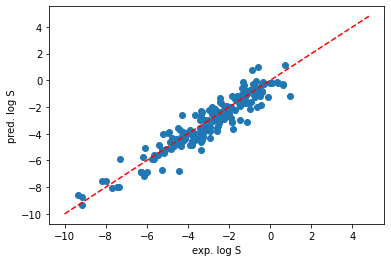

In [30]:
# plot exp vs pred in test
import matplotlib.pyplot as plt
plt.figure(1)

ln = np.arange(-10, 5, 0.2)
plt.plot(ln, ln,'r--')
plt.scatter(test_results[1], test_results[0])
plt.xlabel('exp. log S')
plt.ylabel('pred. log S')

In [31]:
# set heading of columns
pd_pred_test=pd.DataFrame(test_results[0], columns=["predict"])
pd_exp_test=pd.DataFrame(test_results[1], columns=["exp"])
pd_smiles=pd.DataFrame(dataset['test']['smiles'], columns=["smiles"])
pd_test=pd.concat((pd_smiles, pd_exp_test, pd_pred_test), axis=1)

# save predicton to csv 
pd_test.to_csv('esol_bert_ds6_fold1_results.csv')

In [32]:
pd_test

,smiles,exp,predict
0,NC(=O)c1cccnc1,0.610,-0.288363
1,Oc1ccc(c(O)c1)c3oc2cc(O)cc(O)c2c(=O)c3O,-3.083,-3.724570
2,Cc1ccnc(C)c1,0.380,-0.177875
3,NC(=N)NS(=O)(=O)c1ccc(N)cc1,-1.990,-2.431840
4,ClC4=C(Cl)C5(Cl)C3C1CC(C2OC12)C3C4(Cl)C5(Cl)Cl,-6.180,-5.762957
...,...,...,...
185,Nc1nccs1,-0.360,-0.123807
186,Brc1ccc(Br)cc1,-4.070,-3.953462
187,NC(=S)N,0.320,-0.148311
188,CCCCCC1CCCC1,-6.080,-5.059340
